In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# Download CSV file

In [2]:
df = pd.read_csv('coursework_fintech.csv', parse_dates=['Date'], index_col=['Date'],  dayfirst=True)
df

,Open,High,Low,Close,Adj Close
Date,,,,,
1995-01-03,0.347098,0.347098,0.338170,0.342634,0.290447
1995-01-04,0.344866,0.353795,0.344866,0.351563,0.298016
1995-01-05,0.350446,0.351563,0.345982,0.347098,0.294231
1995-01-06,0.371652,0.385045,0.367188,0.375000,0.317883
1995-01-09,0.371652,0.373884,0.366071,0.367885,0.311852
...,...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002,180.330002
2021-12-28,180.160004,181.330002,178.529999,179.289993,179.289993
2021-12-29,179.330002,180.630005,178.139999,179.380005,179.380005


Print the shape of Dataframe  and Check for Null Values

In [3]:
print("Dataframe Shape:", df.shape)
print("Any NaN Values Present?", df.isnull().values.any())

Dataframe Shape: (6799, 5)
Any NaN Values Present? False


# Plot APPL stock price data

Text(0.5, 1.0, 'Daily Apple Inc. Stock Price')

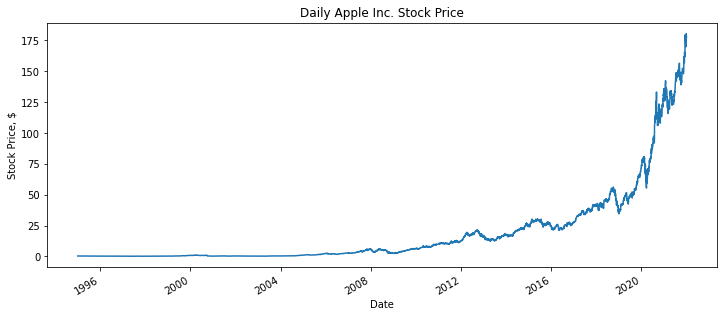

In [4]:
ts = df['Adj Close'].plot(figsize=[12,5])
plt.xlabel('Date')
plt.ylabel('Stock Price, $')
plt.title('Daily Apple Inc. Stock Price')

Text(0.5, 1.0, 'Daily Apple Inc. Stock Price')

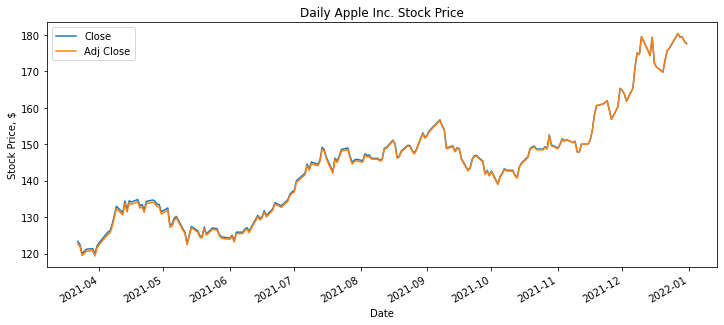

In [5]:
ts = df[['Close','Adj Close']][6600:].plot(figsize=[12,5])
plt.xlabel('Date')
plt.ylabel('Stock Price, $')
plt.title('Daily Apple Inc. Stock Price')

# Setting target variable as the adjusted close price and the feature selection

In [6]:
#Set Target Variable
Y = pd.DataFrame(df["Adj Close"])
Y

,Adj Close
Date,
1995-01-03,0.290447
1995-01-04,0.298016
1995-01-05,0.294231
1995-01-06,0.317883
1995-01-09,0.311852
...,...
2021-12-27,180.330002
2021-12-28,179.289993
2021-12-29,179.380005


In [7]:
#Selecting the Features
features = ["Open", "High", "Low", "Close"]
X = pd.DataFrame(df[features])
X

,Open,High,Low,Close
Date,,,,
1995-01-03,0.347098,0.347098,0.338170,0.342634
1995-01-04,0.344866,0.353795,0.344866,0.351563
1995-01-05,0.350446,0.351563,0.345982,0.347098
1995-01-06,0.371652,0.385045,0.367188,0.375000
1995-01-09,0.371652,0.373884,0.366071,0.367885
...,...,...,...,...
2021-12-27,177.089996,180.419998,177.070007,180.330002
2021-12-28,180.160004,181.330002,178.529999,179.289993
2021-12-29,179.330002,180.630005,178.139999,179.380005


# Split into a train and test set

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 0, shuffle=False)

print("The size of the train set is:", X_train.size, " and the size of the test set is:", X_test.size)
print("The ratio is", round(X_train.size/(X_test.size+X_train.size), 4))

The size of the train set is: 19036  and the size of the test set is: 8160
The ratio is 0.7


# Scale test and train data using StandardScaler from sklearn

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
def scale_datasets(x_train, x_test):
    """
    Standard Scale test and train data
    Z - Score normalization
    """
    standard_scaler = StandardScaler()
    x_train_scaled = pd.DataFrame(
        standard_scaler.fit_transform(x_train),
        columns=x_train.columns
    )
    x_test_scaled = pd.DataFrame(
        standard_scaler.transform(x_test),
        columns = x_test.columns
    )
    return x_train_scaled, x_test_scaled

X_train_scaled, X_test_scaled = scale_datasets(X_train, X_test)

# Baseline model performance
### Using the Close value as the Adjusted Close value for that day. 

In [11]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt


Close_test = pd.DataFrame(X_test['Close'])
BL_r2 = r2_score(Y_test, Close_test)
BL_RMSE = sqrt(mean_squared_error(Y_test, Close_test))
BL_MAE = sqrt(mean_absolute_error(Y_test, Close_test))

print('BASELINE MODEL:')
print('Using the Close value of that day as the Adjusted Close value prediction')
print('    - The R^2 score on test dataset = ',BL_r2)
print('    - RMSE on test dataset = ', BL_RMSE)
print('    - MAE on test dataset = ', BL_MAE)

BASELINE MODEL:
Using the Close value of that day as the Adjusted Close value prediction
    - The R^2 score on test dataset =  0.9981309553203744
    - RMSE on test dataset =  1.7459642428793822
    - MAE on test dataset =  1.2598505780137454


# Basic linear regression model

In [12]:
from sklearn.linear_model import LinearRegression

Fit basic linear regression model to training data:

In [13]:
reg = LinearRegression().fit(X_train_scaled, Y_train)

Make predictions on the test data:

In [14]:
pred = reg.predict(X_test_scaled)

print('Linear Regression model:')
print('    - R^2 score = ',r2_score(y_true= Y_test, y_pred= pred))
print('    - RMSE = ', sqrt(mean_squared_error(y_true= Y_test, y_pred= pred)))
print('    - MAE = ', sqrt(mean_absolute_error(y_true= Y_test, y_pred= pred)))

Linear Regression model:
    - R^2 score =  0.9547989062537144
    - RMSE =  8.586179735033458
    - MAE =  2.467280776436765


The basic linear regression model did not perform better than the baseline model.

There are no hyperparameters for the basic linear model so no hyperparameter tuning to do.

# Ridge regression

In [15]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0).fit(X_train_scaled, Y_train)
pred = ridge.predict(X_test_scaled)

print('Ridge Regression model:')
print('    - R^2 score = ',r2_score(y_true= Y_test, y_pred= pred))
print('    - RMSE = ', sqrt(mean_squared_error(y_true= Y_test, y_pred= pred)))
print('    - MAE = ', sqrt(mean_absolute_error(y_true= Y_test, y_pred= pred)))

Ridge Regression model:
    - R^2 score =  0.9544860848466142
    - RMSE =  8.615839523044757
    - MAE =  2.4710164741281506


In [16]:
coefs = []
r2 = []
RMSE = []
MAE = []

n_alphas = 200
alphas = np.logspace(-3, 2.5, n_alphas)

# Train the model with different regularisation strengths
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_scaled, Y_train)
    coefs.append(ridge.coef_)
    pred = ridge.predict(X_test_scaled)
    r2.append(r2_score(Y_test,pred))
    RMSE.append(sqrt(mean_squared_error(y_true= Y_test, y_pred= pred)))
    MAE.append(sqrt(mean_absolute_error(y_true= Y_test, y_pred= pred)))

coefs = np.reshape(coefs, (n_alphas, 4))

### Plot results (log scale)

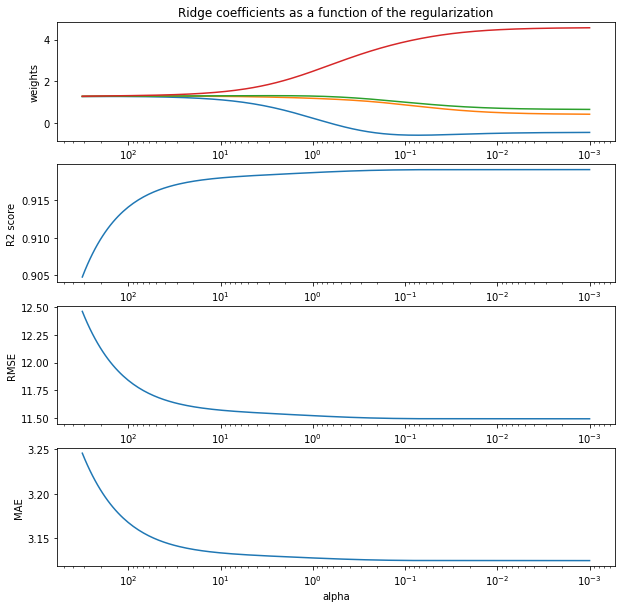

In [17]:
# Display results

plt.figure(figsize=(10, 10))

plt.subplot(411)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

plt.subplot(412)
ax = plt.gca()
ax.plot(alphas, r2)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("")
plt.axis("tight")

plt.subplot(413)
ax = plt.gca()
ax.plot(alphas, RMSE)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.title("")
plt.axis("tight")

plt.subplot(414)
ax = plt.gca()
ax.plot(alphas, MAE)
ax.set_xscale("log")
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("MAE")
plt.title("")
plt.axis("tight")

plt.show()

In [18]:
coefs = []
r2 = []
RMSE = []
MAE = []

n_alphas = 200
alphas = np.linspace(0.05, -0.05, num= n_alphas)

# Train the model with different regularisation strengths
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X_train_scaled, Y_train)
    coefs.append(ridge.coef_)
    pred = ridge.predict(X_test_scaled)
    r2.append(r2_score(Y_test,pred))
    RMSE.append(sqrt(mean_squared_error(y_true= Y_test, y_pred= pred)))
    MAE.append(sqrt(mean_absolute_error(y_true= Y_test, y_pred= pred)))

coefs = np.reshape(coefs, (n_alphas, 4))

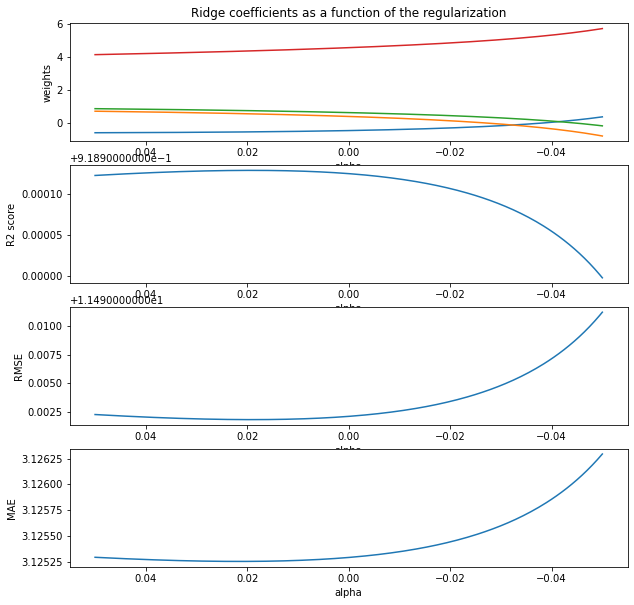

In [19]:

plt.figure(figsize=(10, 10))

plt.subplot(411)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("weights")
plt.title("Ridge coefficients as a function of the regularization")
plt.axis("tight")

plt.subplot(412)
ax = plt.gca()
ax.plot(alphas, r2)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("R2 score")
plt.title("")
plt.axis("tight")

plt.subplot(413)
ax = plt.gca()
ax.plot(alphas, RMSE)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.title("")
plt.axis("tight")

plt.subplot(414)
ax = plt.gca()
ax.plot(alphas, MAE)
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel("alpha")
plt.ylabel("MAE")
plt.title("")
plt.axis("tight")

plt.show()

Optimal alpha value is 0.02

In [20]:
ridge = Ridge(alpha=0.02).fit(X_train_scaled, Y_train)
pred = ridge.predict(X_test_scaled)

print('Ridge Regression model:')
print('    - R^2 score = ',r2_score(y_true= Y_test, y_pred= pred))
print('    - RMSE = ', sqrt(mean_squared_error(y_true= Y_test, y_pred= pred)))
print('    - MAE = ', sqrt(mean_absolute_error(y_true= Y_test, y_pred= pred)))

Ridge Regression model:
    - R^2 score =  0.954801826946041
    - RMSE =  8.585902330303817
    - MAE =  2.467232274410533


# Random Forest Regressor

In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

rfr = RandomForestRegressor(random_state = 1)

param_grid = {  'bootstrap': [True, False], 
                'max_depth': [int(x) for x in np.linspace(5, 100, num = 2)], 
                'n_estimators': [int(x) for x in np.linspace(start = 5 , stop = 15, num = 10)] }

param_grid


{'bootstrap': [True, False],
 'max_depth': [5, 100],
 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [22]:
rfr = RandomizedSearchCV(estimator=rfr, param_distributions=param_grid, n_iter = 20, cv = 3, scoring='neg_root_mean_squared_error', verbose=0, random_state=42, n_jobs=-1, return_train_score=True, refit=True);

Y_train = np.ravel(Y_train)
rfr.fit(X_train_scaled, Y_train);

In [24]:
print(rfr.best_params_)
print(rfr.best_score_)

{'n_estimators': 8, 'max_depth': 100, 'bootstrap': False}
-2.4818184002998898


In [26]:
print(rfr.score(X_test_scaled, Y_test))

-52.12589279740572


In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

X, y = make_regression(n_features=4, n_informative=4, random_state=0, shuffle=False)
regr = RandomForestRegressor(max_depth=100, random_state=0)
regr.fit(X_train_scaled, Y_train)
RandomForestRegressor(...)
print(regr.predict([[0, 0, 0, 0]]))

[3.66417357]
